# Import Librarys

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Load Iris Dataset

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                    header=None,
                    encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[0:100, 4].values

In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values

# Data Visualization (Specific Feature)

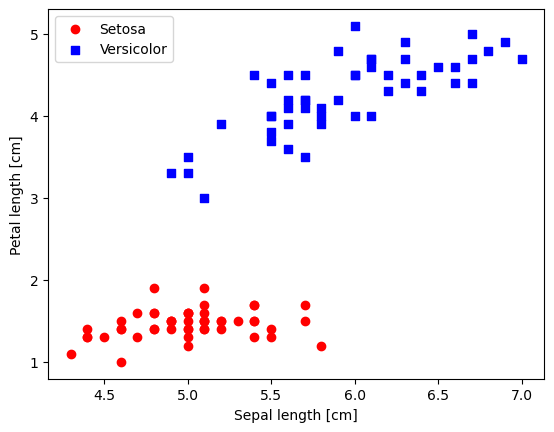

In [7]:
plt.scatter(X[:50, 0], X[:50, 1],
            color="red", marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
            color="blue", marker='s', label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")

plt.show()

# Definition of Adaline Algorithm

In [9]:
class AdalineGD:
    """This function define the Adaptive Linear Neuron classifier
    
    Parameter:
        eta: float
            Learning rate (between 0.0 and 1.0)
        n_iter: int
            Passes over the training dataset.
        random_state: int
            Random number generator seed for random weight initialization
    
    Attributes:
        w_: 1d-array
            Weights after fitting.
        b_: Scalar
            Bias unit after fitting.
        losses_: list
            Means Squared Error loss function values in each epoch.
    """
    def __init__(self, eta=0.001, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """This function fit training data

        Args:
            X (array-like): [n_examples, n_features]. Training vectors
            y (array-like): [n_examples]. Target values

        Returns:
            self: object.
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            """
            Please note that the "activation" method has no effect in the code
            since it is simply and identity function. We could write 'output = self.net_input(X)'
            directly instead. The purpose of the activation is more conceptual. i.e.,
            in the case of logistic regression (as we will see later), we could change it to a
            sigmoid function to implement a logistic regression classifier.
            """
            output = self.activation(net_input)
            errors = (y - output)

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
            
    
    def net_input(self, X):
        """Cacalculated the net input

        Args:
            X (np.array): Training dataset.

        Returns:
            z: a Scalar of the dot multiplication
        """
        return np.dot(X, self.w_) + self.b_
    

    def activation(self, X):
        """Compute linear activation

        Args:
            X (np.array): Training dataset.

        Returns:
            I: Identy value.
        """
        return X
    
    def predict(self, X):
        """Return the class label after unit step

        Args:
            X (_type_): Test dataset

        Returns:
            pred: the prediction array
        """
        return np.where(self.activation(self.net_input(X)) >=0.5, 1, 0)

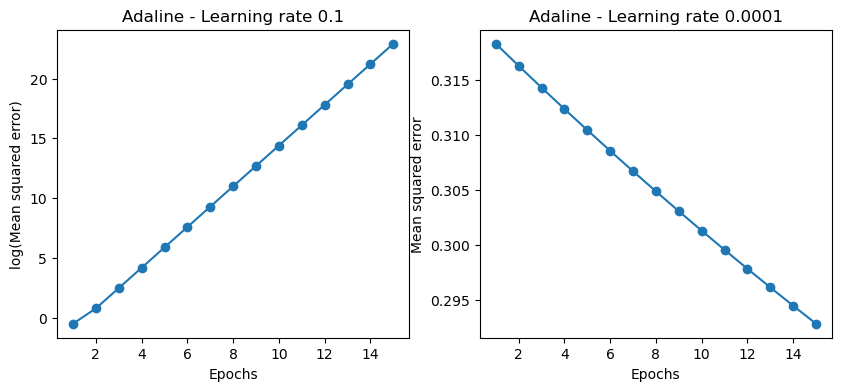

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    """This function plot the decision boundary of the Classifier

    Args:
        X (_type_): Input dataset
        y (_type_): Target dataset
        classifier (_type_): Classifier used to generate the decision boundary
        resolution (float, optional): _description_. Defaults to 0.02.
    """
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black"
        )

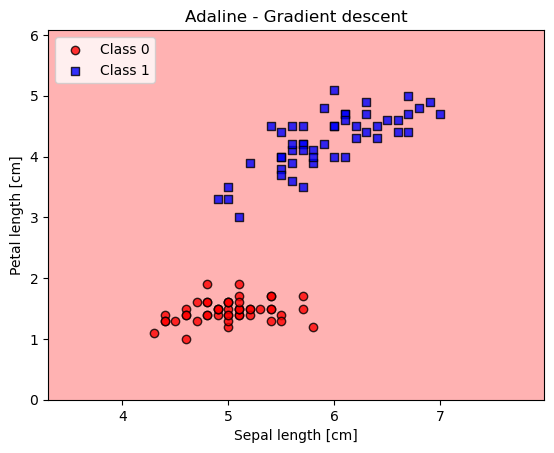

In [19]:
plot_decision_regions(X, y, classifier=ada1)
plt.title('Adaline - Gradient descent')
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [20]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

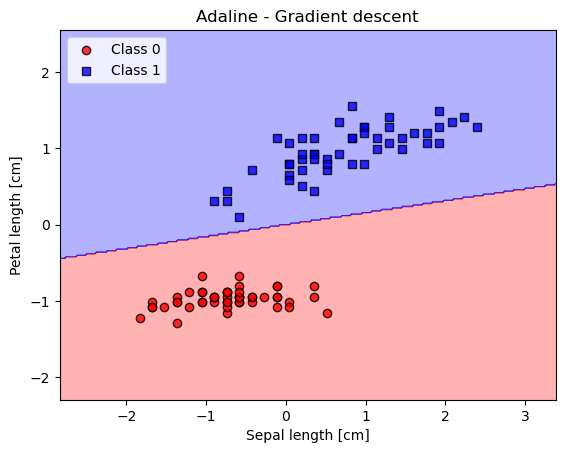

In [24]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

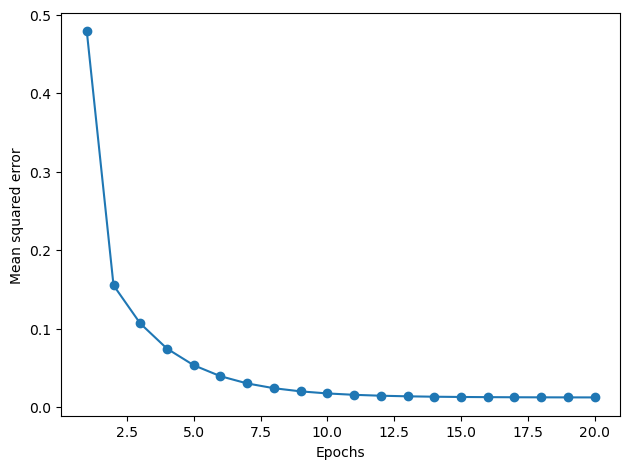

In [22]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
plt.show()

# Adaline Stochastic Gradiente Descent

In [27]:
class AdalineSGD:
    """This function define the Adaptive Linear Neuron classifier
    
    Parameter:
        eta: float
            Learning rate (between 0.0 and 1.0)
        n_iter: int
            Passes over the training dataset.
        random_state: int
            Random number generator seed for random weight initialization
    
    Attributes:
        w_: 1d-array
            Weights after fitting.
        b_: Scalar
            Bias unit after fitting.
        losses_: list
            Means Squared Error loss function values in each epoch.
    """
    def __init__(self, eta=0.001, n_iter=50, shuffle=True, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle

    def fit(self, X, y):
        """This function fit training data

        Args:
            X (array-like): [n_examples, n_features]. Training vectors
            y (array-like): [n_examples]. Target values

        Returns:
            self: object.
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            if (self.shuffle):
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float(0.)
        self.w_initialized = True

    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]


    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target-output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    
    def net_input(self, X):
        """Cacalculated the net input

        Args:
            X (np.array): Training dataset.

        Returns:
            z: a Scalar of the dot multiplication
        """
        return np.dot(X, self.w_) + self.b_
    

    def activation(self, X):
        """Compute linear activation

        Args:
            X (np.array): Training dataset.

        Returns:
            I: Identy value.
        """
        return X
    
    def predict(self, X):
        """Return the class label after unit step

        Args:
            X (_type_): Test dataset

        Returns:
            pred: the prediction array
        """
        return np.where(self.activation(self.net_input(X)) >=0.5, 1, 0)

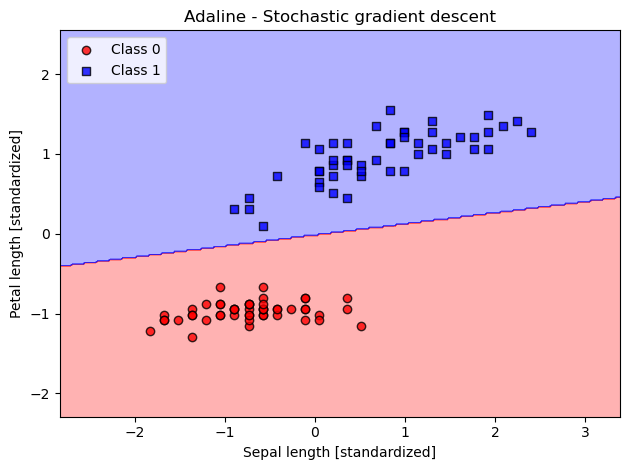

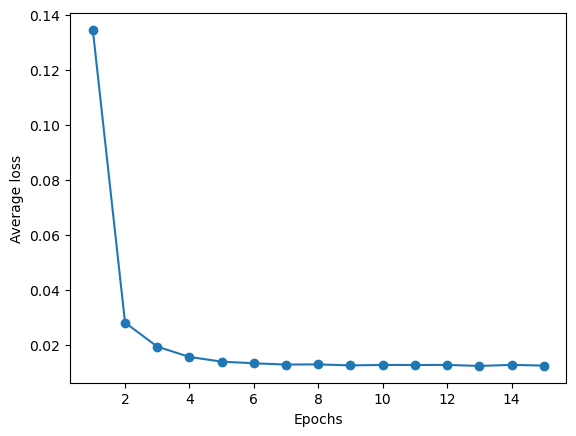

In [29]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.show()